In [1]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from sklearn.model_selection import train_test_split
from torchvision.datasets import ImageFolder
import zipfile
import os


In [2]:
!pip install wget

In [3]:
!wget "https://github.com/chiru30/COMP-6321-Machine-Learning/raw/main/data_brain_tumors.zip"

--2023-11-26 04:24:15--  https://github.com/chiru30/COMP-6321-Machine-Learning/raw/main/data_brain_tumors.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/chiru30/COMP-6321-Machine-Learning/main/data_brain_tumors.zip [following]
--2023-11-26 04:24:15--  https://media.githubusercontent.com/media/chiru30/COMP-6321-Machine-Learning/main/data_brain_tumors.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62292733 (59M) [application/zip]
Saving to: ‘data_brain_tumors.zip.1’

data_brain_tumors.z 100%[===================>]  59.41M  --.-KB/s    in 0.1s    

2023-11-26 04:24:20 (

In [4]:
!unzip "data_brain_tumors.zip"

Archive:  data_brain_tumors.zip
replace Data/glioma_tumor/G_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Data/glioma_tumor/G_1.jpg  
  inflating: Data/glioma_tumor/G_10.jpg  
  inflating: Data/glioma_tumor/G_100.jpg  
  inflating: Data/glioma_tumor/G_101.jpg  
  inflating: Data/glioma_tumor/G_102.jpg  
  inflating: Data/glioma_tumor/G_103.jpg  
  inflating: Data/glioma_tumor/G_104.jpg  
  inflating: Data/glioma_tumor/G_105.jpg  
  inflating: Data/glioma_tumor/G_106.jpg  
  inflating: Data/glioma_tumor/G_107.jpg  
  inflating: Data/glioma_tumor/G_108.jpg  
  inflating: Data/glioma_tumor/G_109.jpg  
  inflating: Data/glioma_tumor/G_11.jpg  
  inflating: Data/glioma_tumor/G_110.jpg  
  inflating: Data/glioma_tumor/G_111.jpg  
  inflating: Data/glioma_tumor/G_112.jpg  
  inflating: Data/glioma_tumor/G_113.jpg  
  inflating: Data/glioma_tumor/G_114.jpg  
  inflating: Data/glioma_tumor/G_115.jpg  
  inflating: Data/glioma_tumor/G_116.jpg  
  inflating: Data/glioma_tumor/G_117.

In [5]:
# Define the transformation without normalization for statistics calculation
transform_stats = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

In [6]:
data_dir = "/content/Data"

# Load the dataset without normalization
dataset_stats = ImageFolder(data_dir, transform=transform_stats)


# Statistics of the dataset

In [7]:
# # Initialize lists to store pixel values for each channel
# r_channel, g_channel, b_channel = [], [], []

# # Iterate through the dataset and collect pixel values
# for img, _ in dataset_stats:
#     # Convert image to a tensor and move channels to the front (3 x H x W)
#     img_tensor = img.permute(1, 2, 0)
#     # Separate the RGB channels
#     r_tensor = img_tensor[:, :, 0]  # Red channel
#     g_tensor = img_tensor[:, :, 1]  # Green channel
#     b_tensor = img_tensor[:, :, 2]  # Blue channel
#     # Calculate mean for each channel and append to respective lists
#     r_channel.append(r_tensor.mean())
#     g_channel.append(g_tensor.mean())
#     b_channel.append(b_tensor.mean())

# # Calculate mean and standard deviation for each channel
# mean_r = torch.stack(r_channel).mean()
# mean_g = torch.stack(g_channel).mean()
# mean_b = torch.stack(b_channel).mean()

# std_r = torch.stack(r_channel).std()
# std_g = torch.stack(g_channel).std()
# std_b = torch.stack(b_channel).std()

# # Display the computed statistics
# print(f"Mean - R: {mean_r}, G: {mean_g}, B: {mean_b}")
# print(f"Std Deviation - R: {std_r}, G: {std_g}, B: {std_b}")


Mean - R: 0.2108173966407776, G: 0.2108173966407776, B: 0.2108173966407776
Std Deviation - R: 0.056193072348833084, G: 0.056193072348833084, B: 0.056193072348833084


In [8]:
# Initialize lists to store pixel values
all_images = []
for img, _ in dataset_stats:
    all_images.append(img)

# Concatenate all tensor images into a single tensor
all_images = torch.stack(all_images)

# Calculate mean and std along each channel (dimension 1 and 2)
mean = all_images.mean(dim=(0, 2, 3))  # Compute mean
std = all_images.std(dim=(0, 2, 3))  # Compute std

print("Mean:", mean)
print("Std Deviation:", std)

Mean: tensor([0.2108, 0.2108, 0.2108])
Std Deviation: tensor([0.2013, 0.2013, 0.2013])


In [10]:
from collections import defaultdict
import os
from PIL import Image

# Initialize variables for statistics
class_distribution = defaultdict(int)
image_sizes = []

# Iterate through the dataset to collect statistics
for root, _, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            img = Image.open(file_path)
            width, height = img.size
            image_sizes.append((width, height))
            label = file_path.split(os.sep)[-2]  # Extract label assuming directory structure represents labels
            class_distribution[label] += 1
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

# Calculate dataset size
total_samples = sum(class_distribution.values())

# Calculate class distribution
print("Class Distribution:")
for class_label, count in class_distribution.items():
    print(f"Class {class_label}: {count} samples")

# Calculate image size distribution
widths, heights = zip(*image_sizes)
min_width, max_width = min(widths), max(widths)
min_height, max_height = min(heights), max(heights)
print("\nImage Size Distribution:")
print(f"Minimum Width: {min_width}, Maximum Width: {max_width}")
print(f"Minimum Height: {min_height}, Maximum Height: {max_height}")

# Display total dataset size
print(f"\nTotal Samples in the Dataset: {total_samples}")


Class Distribution:
Class glioma_tumor: 901 samples
Class meningioma_tumor: 913 samples
Class pituitary_tumor: 844 samples
Class normal: 438 samples

Image Size Distribution:
Minimum Width: 256, Maximum Width: 256
Minimum Height: 256, Maximum Height: 256

Total Samples in the Dataset: 3096


In [11]:
classes = dataset_stats.classes
print(classes)

['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']


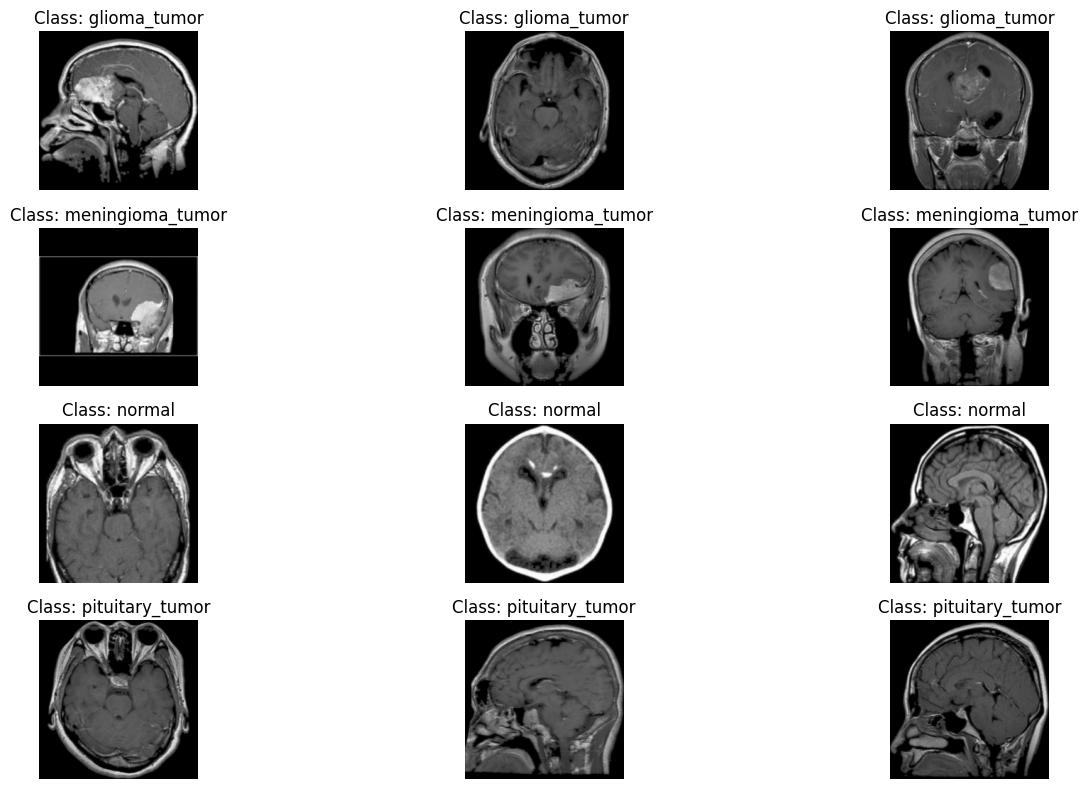

In [12]:
import matplotlib.pyplot as plt

num_images_per_class = 3

# Display sample images from each class
plt.figure(figsize=(15, 8))

for i, class_name in enumerate(classes):
    class_indices = dataset_stats.class_to_idx[class_name]

    # Filter images for the current class
    class_images = [img_idx for img_idx, label in enumerate(dataset_stats.targets) if label == class_indices]

    # Display sample images for the current class
    for j in range(num_images_per_class):
        img, _ = dataset_stats[class_images[j]]
        img_np = img.permute(1, 2, 0).numpy()

        # Plot images
        plt.subplot(len(classes), num_images_per_class, i * num_images_per_class + j + 1)
        plt.imshow(img_np)
        plt.title(f"Class: {class_name}")
        plt.axis('off')

plt.tight_layout()
plt.show()

# Data Preprocessing

In [73]:
# Hyperparameters
learning_rate = 0.01
epochs = 10
batch_size = 32
weight_decay = 0.01

# Optimizer and Loss function
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(resnet_scratch.parameters(), lr=learning_rate, momentum=0.9)

In [74]:
from torch.utils.data import DataLoader, random_split

# Define transformations for data preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.2108, 0.2108, 0.2108], std=[0.2013, 0.2013, 0.2013])  # Use the computed mean and std
])

# Load the dataset with transformations
dataset = ImageFolder(data_dir, transform=transform)

# Split the dataset into train and test sets (70% train, 30% test)
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoader objects for train and test sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, drop_last=False)


In [75]:
from torchvision import models
import torch.optim as optim

# Define the ResNet-18 model
resnet_scratch = models.resnet18(pretrained=False)  # Load the pre-trained weights
num_classes = len(dataset.classes)
resnet_scratch.fc = nn.Linear(resnet_scratch.fc.in_features, num_classes)

optimizer = optim.Adam(resnet_scratch.parameters(), lr=learning_rate, weight_decay=weight_decay)

In [76]:
# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to device
resnet_scratch.to(device)

# Inside your training function
def train(model, train_loader, criterion, lr, epochs, weight_decay=0):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    train_acc_epoch = []
    train_loss_epoch = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)  # Move inputs to device
            labels = labels.to(device)  # Move labels to device

            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        train_loss_epoch.append(epoch_loss)
        train_acc_epoch.append(epoch_acc.item())

        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc * 100:.2f}%')

    return train_acc_epoch, train_loss_epoch

# # Example usage
# train_acc_epoch, train_loss_epoch = train(resnet_scratch, train_loader, criterion, lr=0.001, epochs=20, weight_decay=1e-5)





In [77]:
# Training ResNet-18 from scratch

train_acc_epoch, train_loss_epoch = train(resnet_scratch, train_loader, criterion, lr=0.01, epochs=10)


Epoch [1/10], Loss: 1.5225, Accuracy: 41.53%
Epoch [2/10], Loss: 1.2051, Accuracy: 46.98%
Epoch [3/10], Loss: 1.0873, Accuracy: 53.07%
Epoch [4/10], Loss: 0.9454, Accuracy: 60.27%
Epoch [5/10], Loss: 0.8527, Accuracy: 64.42%
Epoch [6/10], Loss: 0.7703, Accuracy: 67.51%
Epoch [7/10], Loss: 0.6924, Accuracy: 71.53%
Epoch [8/10], Loss: 0.6060, Accuracy: 75.63%
Epoch [9/10], Loss: 0.5371, Accuracy: 79.56%
Epoch [10/10], Loss: 0.4957, Accuracy: 80.48%


Transfer Learning: Fine-tuning

In [80]:
# Training a pre-trained ResNet-18

pretrained_resnet = models.resnet18(pretrained=True)
pretrained_resnet.fc = nn.Linear(pretrained_resnet.fc.in_features, num_classes)
pretrained_optimizer = optim.Adam(resnet_scratch.parameters(), lr=learning_rate, weight_decay=weight_decay)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [81]:
criterion = nn.CrossEntropyLoss()
pretrained_resnet.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [87]:
train_acc_epoch_pretrained, train_loss_epoch_pretrained = train(pretrained_resnet, train_loader, criterion, lr=0.01, epochs=10)

Epoch [1/10], Loss: 0.7611, Accuracy: 70.70%
Epoch [2/10], Loss: 0.6178, Accuracy: 76.23%
Epoch [3/10], Loss: 0.5524, Accuracy: 78.59%
Epoch [4/10], Loss: 0.5282, Accuracy: 80.53%
Epoch [5/10], Loss: 0.4692, Accuracy: 82.46%
Epoch [6/10], Loss: 0.3541, Accuracy: 87.40%
Epoch [7/10], Loss: 0.4100, Accuracy: 85.33%
Epoch [8/10], Loss: 0.2984, Accuracy: 89.71%
Epoch [9/10], Loss: 0.2502, Accuracy: 91.14%
Epoch [10/10], Loss: 0.2874, Accuracy: 89.76%


# Performance Comparision

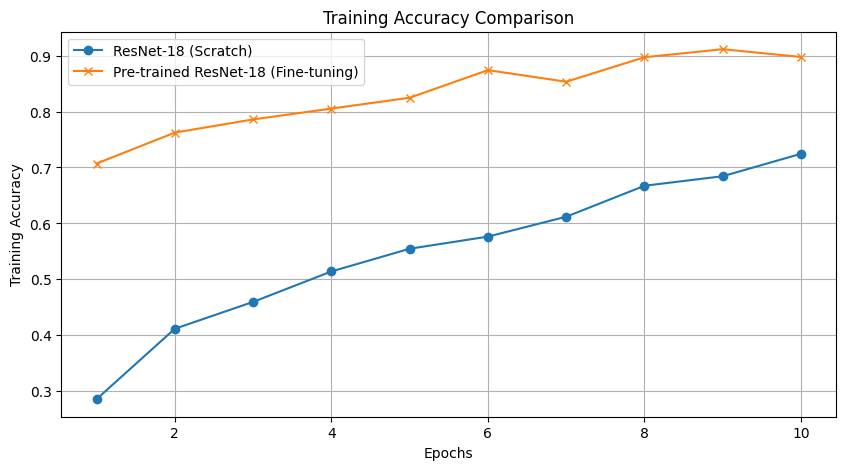

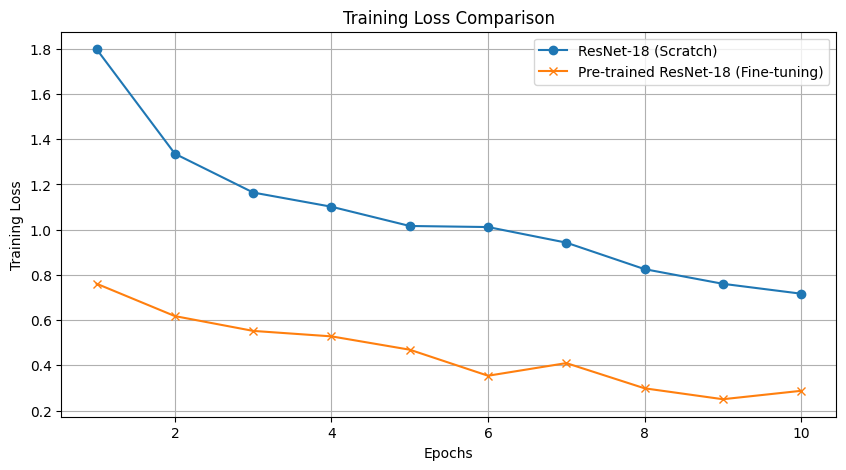

In [88]:
import matplotlib.pyplot as plt

epochs = range(1, 11)
# Plotting Training Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc_epoch, label='ResNet-18 (Scratch)', marker='o')
plt.plot(epochs, train_acc_epoch_pretrained, label='Pre-trained ResNet-18 (Fine-tuning)', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Training Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss_epoch, label='ResNet-18 (Scratch)', marker='o')
plt.plot(epochs, train_loss_epoch_pretrained, label='Pre-trained ResNet-18 (Fine-tuning)', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [89]:
from sklearn.metrics import classification_report

# Function to evaluate model on test data
def evaluate_model(model, test_loader):
    model.eval()
    all_predictions = []
    true_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_predictions.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return all_predictions, true_labels

# Evaluate ResNet-18 trained from scratch
predictions_scratch, true_labels = evaluate_model(resnet_scratch, test_loader)

# Evaluate Pre-trained ResNet-18 with fine-tuning
predictions_finetune, _ = evaluate_model(pretrained_resnet, test_loader)

# Get class labels from the dataset
class_labels = dataset.classes

# Generate classification reports
report_scratch = classification_report(true_labels, predictions_scratch, target_names=class_labels)
report_finetune = classification_report(true_labels, predictions_finetune, target_names=class_labels)

# Print classification reports
print("Classification Report - ResNet-18 (Trained from Scratch):")
print(report_scratch)
print("\nClassification Report - Pre-trained ResNet-18 (Fine-tuning):")
print(report_finetune)


Classification Report - ResNet-18 (Trained from Scratch):
                  precision    recall  f1-score   support

    glioma_tumor       0.80      0.69      0.74       254
meningioma_tumor       0.69      0.65      0.67       279
          normal       0.65      0.52      0.58       136
 pituitary_tumor       0.69      0.90      0.78       260

        accuracy                           0.71       929
       macro avg       0.71      0.69      0.69       929
    weighted avg       0.71      0.71      0.71       929


Classification Report - Pre-trained ResNet-18 (Fine-tuning):
                  precision    recall  f1-score   support

    glioma_tumor       0.28      0.17      0.21       254
meningioma_tumor       0.28      0.34      0.30       279
          normal       0.12      0.10      0.11       136
 pituitary_tumor       0.28      0.36      0.31       260

        accuracy                           0.26       929
       macro avg       0.24      0.24      0.23       929
    w